# Aplicando SVM para classificação de vinhos

## Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Importando o dataset

In [2]:
from sklearn.datasets import load_wine

In [3]:
wine = load_wine()

### Leitura dos dados

In [4]:
X = wine.data

In [5]:
y = wine.target

In [6]:
X.shape, y.shape

((178, 13), (178,))

In [7]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [8]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

### Dividindo os dados

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
ts = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=42)

## Treinando o SVM

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [12]:
model_clean = make_pipeline(StandardScaler(), SVC())

## SVM

### Procurando os `Kernels`

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
param_grid = {
    'svc__C': [0.01, 0.5, 1, 5],
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svc__decision_function_shape':  ['ovo', 'ovr']
}
grid = GridSearchCV(model_clean, param_grid)

%time grid.fit(X_train, y_train)
print(grid.best_params_)

CPU times: user 308 ms, sys: 3.63 ms, total: 312 ms
Wall time: 316 ms
{'svc__C': 0.5, 'svc__decision_function_shape': 'ovo', 'svc__kernel': 'linear'}


In [15]:
model_clean = grid.best_estimator_
y_fit = model_clean.predict(X_test)

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_fit,
                            target_names=wine.target_names))

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        20
     class_1       1.00      0.96      0.98        24
     class_2       0.94      1.00      0.97        15

    accuracy                           0.98        59
   macro avg       0.98      0.99      0.98        59
weighted avg       0.98      0.98      0.98        59



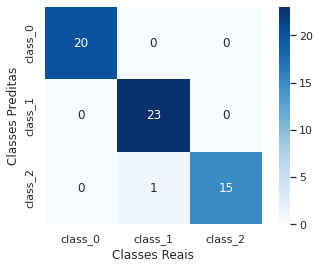

In [17]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_fit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=wine.target_names,
            yticklabels=wine.target_names,cmap=plt.cm.Blues)
plt.xlabel('Classes Reais')
plt.ylabel('Classes Preditas');

### Testando os `kernels` e parâmetros

In [18]:
kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']

In [19]:
def gs_best_params(C_list, gamma_list, decision_list, X_test):
    
    for kernel in kernel_list:
        model = make_pipeline(StandardScaler(), SVC(kernel=kernel))
        
        if kernel == 'linear':
            param_grid = {
                'svc__C': C_list,
                'svc__decision_function_shape':  decision_list
            }
        else:
            param_grid = {
                'svc__C': C_list,
                'svc__gamma': gamma_list,
                'svc__decision_function_shape':  decision_list
            }
        
        grid = GridSearchCV(model, param_grid)
        print(f"### Grid Search ({model.named_steps.svc.kernel}) ###")
        %time grid.fit(X_train, y_train)
        print(grid.best_params_)
        model = grid.best_estimator_
        y_fit = model.predict(X_test)
        print("### Classification report ###")
        print(classification_report(
            y_test, y_fit, target_names=wine.target_names)
        )
        mat = confusion_matrix(y_test, y_fit)
        sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
                    xticklabels=wine.target_names,
                    yticklabels=wine.target_names,cmap=plt.cm.Blues)
        plt.title('Confusion Matrix')
        plt.xlabel('Classes Reais')
        plt.ylabel('Classes Preditas');
        plt.show()
        print("\n")

### Grid Search (linear) ###
CPU times: user 152 ms, sys: 0 ns, total: 152 ms
Wall time: 151 ms
{'svc__C': 1, 'svc__decision_function_shape': 'ovo'}
### Classification report ###
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        20
     class_1       1.00      0.96      0.98        24
     class_2       0.94      1.00      0.97        15

    accuracy                           0.98        59
   macro avg       0.98      0.99      0.98        59
weighted avg       0.98      0.98      0.98        59



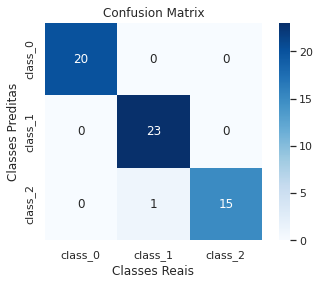



### Grid Search (poly) ###
CPU times: user 582 ms, sys: 0 ns, total: 582 ms
Wall time: 582 ms
{'svc__C': 30, 'svc__decision_function_shape': 'ovo', 'svc__gamma': 0.05}
### Classification report ###
              precision    recall  f1-score   support

     class_0       0.95      1.00      0.98        20
     class_1       1.00      0.96      0.98        24
     class_2       1.00      1.00      1.00        15

    accuracy                           0.98        59
   macro avg       0.98      0.99      0.98        59
weighted avg       0.98      0.98      0.98        59



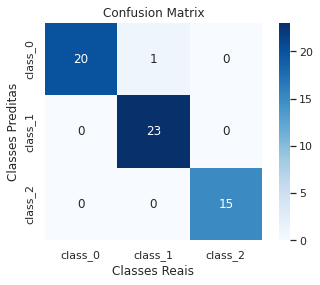



### Grid Search (rbf) ###
CPU times: user 599 ms, sys: 0 ns, total: 599 ms
Wall time: 597 ms
{'svc__C': 1, 'svc__decision_function_shape': 'ovo', 'svc__gamma': 0.01}
### Classification report ###
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        20
     class_1       1.00      1.00      1.00        24
     class_2       1.00      1.00      1.00        15

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



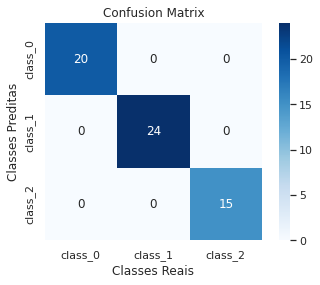



### Grid Search (sigmoid) ###
CPU times: user 645 ms, sys: 16 ms, total: 661 ms
Wall time: 670 ms
{'svc__C': 1, 'svc__decision_function_shape': 'ovo', 'svc__gamma': 0.05}
### Classification report ###
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        20
     class_1       1.00      1.00      1.00        24
     class_2       1.00      1.00      1.00        15

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



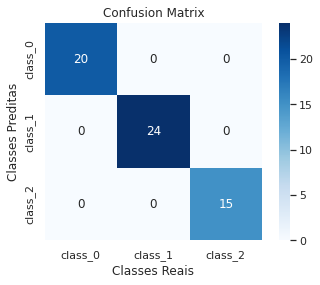

In [20]:
C_list = [0.001, 0.05, 1, 5, 10, 30, 40]
gamma_list = [0.001, 0.005, 0.01, 0.05, 1]
decision_list = ['ovo', 'ovr']

gs_best_params(C_list, gamma_list, decision_list, X_test)

## Validação cruzada

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn import svm
from sklearn import preprocessing

### Computando métricas

Adotando os parâmetros que mais acertaram acima, junto com a [métrica](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) excolhida

In [22]:
clf = make_pipeline(StandardScaler(), 
                    svm.SVC(kernel='rbf', 
                            C=1, 
                            gamma=0.01, 
                            decision_function_shape='ovo', 
                            random_state=42))

# gera os 5 splits
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

# computa diretamente os valores as métricas de saída para cada execução da validação cruzada
scores = cross_val_score(clf, X, y, cv=cv, scoring='f1_macro')
print(scores)
print("%0.4f de acurácia com desvio padrão de %0.2f" % (scores.mean(), scores.std()))

[1.         0.95061728 1.         1.         0.9789713 ]
0.9859 de acurácia com desvio padrão de 0.02


### Validação de múltiplas métricas

In [23]:
from sklearn.model_selection import cross_validate

In [24]:
# métricas a serem computadas
scoring = ['precision_macro', 'recall_macro']

# definindo o modelo
clf = svm.SVC(kernel='linear', C=1, random_state=0)

# treinando o modelo com validação cruzada - Usando strings no scoring
scores = cross_validate(clf, X, y, scoring=scoring)
# imprimindo as chaves
# print(sorted(scores.keys()))
for keys in scores.keys():
    print('###', keys, '###')
    print(scores[keys])

### fit_time ###
[0.04427958 0.04362321 0.05362153 0.05043197 0.04594731]
### score_time ###
[0.00123    0.00112438 0.00120044 0.00111556 0.00130177]
### test_precision_macro ###
[0.8974359  0.94405594 0.97777778 1.         1.        ]
### test_recall_macro ###
[0.9047619  0.95238095 0.97222222 1.         1.        ]


## Otimizando os hiper-parâmetros

### Grid Search exaustivo

In [25]:
kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']

In [26]:
C_list = [0.001, 0.05, 1]
gamma_list = [1e-3, 1e-4, 1e-5]
decision_list = ['ovo', 'ovr']

In [27]:
import warnings
warnings.filterwarnings('ignore') 

In [28]:
# Seta os possíveis parâmetros
#   Note que quando usamos kernel RBF também precisamos otimizar o parâmetro gamma
tuned_parameters = [{'kernel': ['rbf'], 
                     'gamma': gamma_list,
                     'C': C_list},
                    {'kernel': ['linear'], 
                     'C': C_list},
                   {'kernel': ['poly'],
                    'gamma': gamma_list,
                    'C': C_list},
                   {'kernel': ['sigmoid'],
                    'gamma': gamma_list,
                    'C': C_list}]

# métricas
scores = ['precision', 'recall']

for score in scores:
    print("# Otimizando os hyper-parameters para %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Melhor conjunto de parâmetros encontrados durante treinamento com validação cruzada:")
    print()
    print(clf.best_params_)
    print()
    print("Resultado da validação cruzada para cada combinação da grade:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Relatório de classificação detalhado:")
    print()
    print("O modelo é treinado sobre todo o conjunto de treinamento.")
    print("As métricas são computadas apenas considerando o conjunto de testes.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Otimizando os hyper-parameters para precision

Melhor conjunto de parâmetros encontrados durante treinamento com validação cruzada:

{'C': 0.05, 'kernel': 'linear'}

Resultado da validação cruzada para cada combinação da grade:

0.132 (+/-0.012) for {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}
0.132 (+/-0.012) for {'C': 0.001, 'gamma': 0.0001, 'kernel': 'rbf'}
0.132 (+/-0.012) for {'C': 0.001, 'gamma': 1e-05, 'kernel': 'rbf'}
0.132 (+/-0.012) for {'C': 0.05, 'gamma': 0.001, 'kernel': 'rbf'}
0.411 (+/-0.273) for {'C': 0.05, 'gamma': 0.0001, 'kernel': 'rbf'}
0.451 (+/-0.080) for {'C': 0.05, 'gamma': 1e-05, 'kernel': 'rbf'}
0.726 (+/-0.212) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.686 (+/-0.159) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.689 (+/-0.115) for {'C': 1, 'gamma': 1e-05, 'kernel': 'rbf'}
0.727 (+/-0.185) for {'C': 0.001, 'kernel': 'linear'}
0.945 (+/-0.083) for {'C': 0.05, 'kernel': 'linear'}
0.940 (+/-0.040) for {'C': 1, 'kernel': 'linear'}
0.923 (+/-0.122) for 

### Busca aleatória

In [29]:
from time import time
import scipy.stats as stats
from sklearn.utils.fixes import loguniform
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV

In [30]:
# construindo um classificador
clf = SGDClassifier(loss='hinge', penalty='elasticnet',
                    fit_intercept=True)


# função para processar o resultado
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Modelo com rank: {0}".format(i))
            print("Media sobre conjunto de validação: {0:.3f} (desvio: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parâmetros: {0}".format(results['params'][candidate]))
            print("")


# especificando os parâmetros e distribuições
param_dist = {'average': [True, False],
              'l1_ratio': stats.uniform(0, 1),
              'alpha': loguniform(1e-4, 1e0)}

# executando a busca aleatória
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV levou %.2f segundos para %d combinações"
      " candidatas." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

# usando o grid search completo
param_grid = {'average': [True, False],
              'l1_ratio': np.linspace(0, 1, num=10),
              'alpha': np.power(10, np.arange(-4, 1, dtype=float))}

# executando o grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)
start = time()
grid_search.fit(X, y)

print("GridSearchCV levou %.2f segundos para %d combinações candidatas"
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

RandomizedSearchCV levou 0.30 segundos para 20 combinações candidatas.
Modelo com rank: 1
Media sobre conjunto de validação: 0.686 (desvio: 0.071)
Parâmetros: {'alpha': 0.0016294113102442614, 'average': True, 'l1_ratio': 0.8626664681693152}

Modelo com rank: 2
Media sobre conjunto de validação: 0.686 (desvio: 0.037)
Parâmetros: {'alpha': 0.03228849763742767, 'average': True, 'l1_ratio': 0.7881183699988745}

Modelo com rank: 3
Media sobre conjunto de validação: 0.675 (desvio: 0.056)
Parâmetros: {'alpha': 0.18901152134981786, 'average': True, 'l1_ratio': 0.5725634365522161}

GridSearchCV levou 1.43 segundos para 100 combinações candidatas
Modelo com rank: 1
Media sobre conjunto de validação: 0.692 (desvio: 0.113)
Parâmetros: {'alpha': 0.001, 'average': False, 'l1_ratio': 0.7777777777777777}

Modelo com rank: 1
Media sobre conjunto de validação: 0.692 (desvio: 0.074)
Parâmetros: {'alpha': 0.01, 'average': False, 'l1_ratio': 0.8888888888888888}

Modelo com rank: 3
Media sobre conjunto de v

### Comparando Grid Search com Divisões Sucessivas

In [38]:
from sklearn.experimental import enable_halving_search_cv # noqa
from sklearn.model_selection import HalvingGridSearchCV

In [37]:
# rng = np.random.RandomState(0)
# X, y = datasets.make_classification(n_samples=1000, random_state=rng)

gammas = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
Cs = [1, 10, 100, 1e3, 1e4, 1e5]
param_grid = {'gamma': gammas, 'C': Cs}

clf = SVC(random_state=rng)

tic = time()
gsh = HalvingGridSearchCV(estimator=clf, param_grid=param_grid, factor=2,
                          random_state=rng)
gsh.fit(X, y)
gsh_time = time() - tic

tic = time()
gs = GridSearchCV(estimator=clf, param_grid=param_grid)
gs.fit(X, y)
gs_time = time() - tic

In [40]:
import pandas as pd

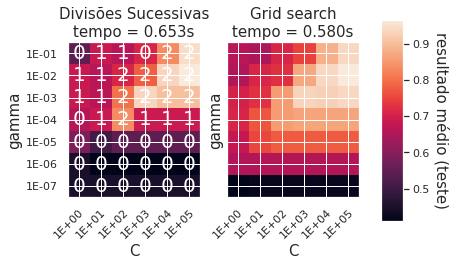

In [41]:
def make_heatmap(ax, gs, is_sh=False, make_cbar=False):
    results = pd.DataFrame.from_dict(gs.cv_results_)
    results['params_str'] = results.params.apply(str)
    if is_sh:
        # SH dataframe: get mean_test_score values for the highest iter
        scores_matrix = results.sort_values('iter').pivot_table(
                index='param_gamma', columns='param_C',
                values='mean_test_score', aggfunc='last'
        )
    else:
        scores_matrix = results.pivot(index='param_gamma', columns='param_C',
                                      values='mean_test_score')

    im = ax.imshow(scores_matrix)

    ax.set_xticks(np.arange(len(Cs)))
    ax.set_xticklabels(['{:.0E}'.format(x) for x in Cs])
    ax.set_xlabel('C', fontsize=15)

    ax.set_yticks(np.arange(len(gammas)))
    ax.set_yticklabels(['{:.0E}'.format(x) for x in gammas])
    ax.set_ylabel('gamma', fontsize=15)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    if is_sh:
        iterations = results.pivot_table(index='param_gamma',
                                         columns='param_C', values='iter',
                                         aggfunc='max').values
        for i in range(len(gammas)):
            for j in range(len(Cs)):
                ax.text(j, i, iterations[i, j],
                        ha="center", va="center", color="w", fontsize=20)

    if make_cbar:
        fig.subplots_adjust(right=0.8)
        cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
        fig.colorbar(im, cax=cbar_ax)
        cbar_ax.set_ylabel('resultado médio (teste)', rotation=-90, va="bottom",
                           fontsize=15)


fig, axes = plt.subplots(ncols=2, sharey=True)
ax1, ax2 = axes

make_heatmap(ax1, gsh, is_sh=True)
make_heatmap(ax2, gs, make_cbar=True)

ax1.set_title('Divisões Sucessivas\ntempo = {:.3f}s'.format(gsh_time),
              fontsize=15)
ax2.set_title('Grid search\ntempo = {:.3f}s'.format(gs_time), fontsize=15)

plt.show()